**Running population demographics - Wazi Ahanhan Oyanke**

In [2]:
pip install census

Note: you may need to restart the kernel to use updated packages.


In [13]:
from census import Census
import pandas as pd

# Initialize Census with your API key
c = Census("94e0f9aa155dc0603dcb7f911d122b13d4bde1eb")

In [15]:


# Initialize Census with your API key
c = Census("94e0f9aa155dc0603dcb7f911d122b13d4bde1eb")

# Oglala Lakota County FIPS: 46102 (State=46, County=102)
variables = {
    # Youth
    "Under 5 Male": "B01001_003E",
    "Under 5 Female": "B01001_027E",
    "5-9 Male": "B01001_004E",
    "5-9 Female": "B01001_028E",
    "10-14 Male": "B01001_005E", 
    "10-14 Female": "B01001_029E",
    "15-17 Male": "B01001_006E",
    "15-17 Female": "B01001_030E",
    
    # Young Adults
    "18-19 Male": "B01001_007E",
    "18-19 Female": "B01001_031E",
    "20 Male": "B01001_008E",
    "20 Female": "B01001_032E",
    "21 Male": "B01001_009E",
    "21 Female": "B01001_033E",
    "22-24 Male": "B01001_010E",
    "22-24 Female": "B01001_034E",
    
    # Adults
    "25-29 Male": "B01001_011E",
    "25-29 Female": "B01001_035E",
    "30-34 Male": "B01001_012E",
    "30-34 Female": "B01001_036E",
    "35-39 Male": "B01001_013E",
    "35-39 Female": "B01001_037E",
    "40-44 Male": "B01001_014E",
    "40-44 Female": "B01001_038E",
    "45-49 Male": "B01001_015E",
    "45-49 Female": "B01001_039E",
    "50-54 Male": "B01001_016E",
    "50-54 Female": "B01001_040E",
    
    # Older Adults
    "55-59 Male": "B01001_017E",
    "55-59 Female": "B01001_041E",
    "60-61 Male": "B01001_018E",
    "60-61 Female": "B01001_042E",
    "62-64 Male": "B01001_019E",
    "62-64 Female": "B01001_043E",
    
    # Seniors
    "65-66 Male": "B01001_020E",
    "65-66 Female": "B01001_044E",
    "67-69 Male": "B01001_021E",
    "67-69 Female": "B01001_045E",
    "70-74 Male": "B01001_022E",
    "70-74 Female": "B01001_046E",
    "75-79 Male": "B01001_023E",
    "75-79 Female": "B01001_047E",
    "80-84 Male": "B01001_024E",
    "80-84 Female": "B01001_048E",
    "85+ Male": "B01001_025E",
    "85+ Female": "B01001_049E"
}

# Fetch data
data = c.acs5.get(list(variables.values()), 
                 {"for": "county:102", "in": "state:46"})

# Convert to DataFrame
df = pd.DataFrame(data)
df = df.rename(columns={v:k for k,v in variables.items()})

# Sum age groups with future-proof pandas syntax
results = {
    # Youth
    "Under 5": {
        "Male": int(df["Under 5 Male"].iloc[0]),
        "Female": int(df["Under 5 Female"].iloc[0])
    },
    "5-17": {
        "Male": df[["5-9 Male", "10-14 Male", "15-17 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["5-9 Female", "10-14 Female", "15-17 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Young Adults
    "18-24": {
        "Male": df[["18-19 Male", "20 Male", "21 Male", "22-24 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["18-19 Female", "20 Female", "21 Female", "22-24 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Adults
    "25-34": {
        "Male": df[["25-29 Male", "30-34 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["25-29 Female", "30-34 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "35-44": {
        "Male": df[["35-39 Male", "40-44 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["35-39 Female", "40-44 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "45-54": {
        "Male": df[["45-49 Male", "50-54 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["45-49 Female", "50-54 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Older Adults
    "55-64": {
        "Male": df[["55-59 Male", "60-61 Male", "62-64 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["55-59 Female", "60-61 Female", "62-64 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Seniors
    "65-74": {
        "Male": df[["65-66 Male", "67-69 Male", "70-74 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["65-66 Female", "67-69 Female", "70-74 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "75-84": {
        "Male": df[["75-79 Male", "80-84 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["75-79 Female", "80-84 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "85+": {
        "Male": int(df["85+ Male"].iloc[0]),
        "Female": int(df["85+ Female"].iloc[0])
    }
}

final_df = pd.DataFrame(results).T
print(final_df)

         Male  Female
Under 5   693     548
5-17     2016    1790
18-24     836     818
25-34     988     927
35-44     723     764
45-54     687     731
55-64     566     583
65-74     314     378
75-84      56     173
85+         7      97


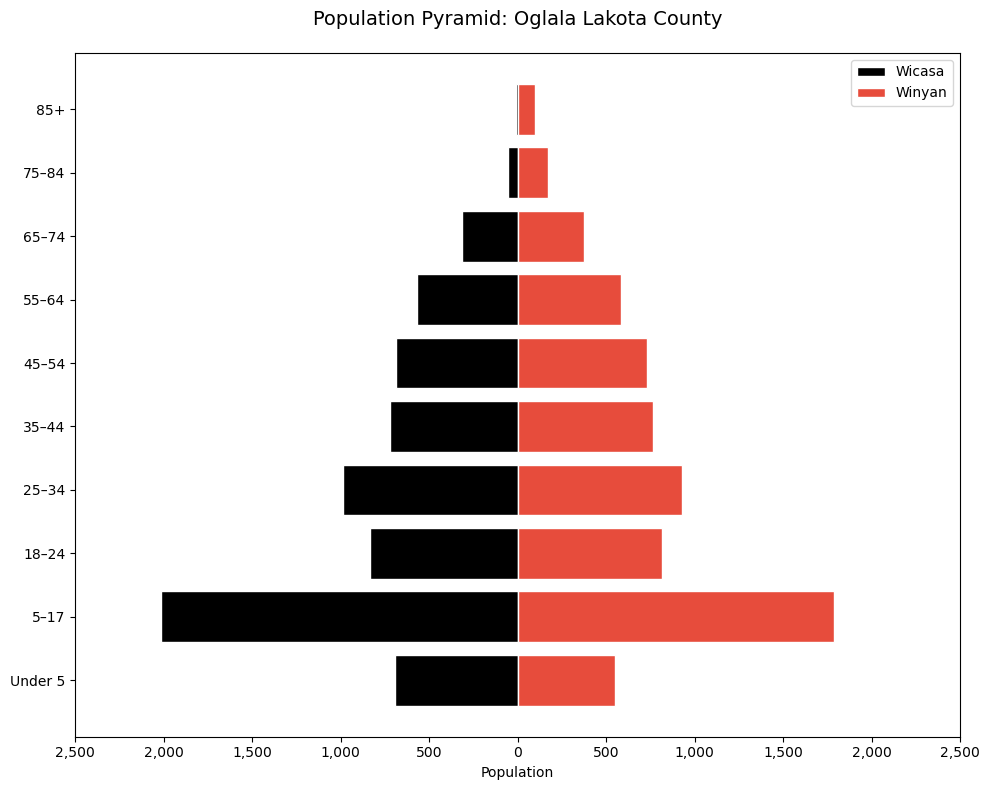

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
age_groups = ['Under 5', '5–17', '18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']
male = [693, 2016, 836, 988, 723, 687, 566, 314, 56, 7]
female = [548, 1790, 818, 927, 764, 731, 583, 378, 173, 97]

# Create pyramid
fig, ax = plt.subplots(figsize=(10, 8))
y_pos = np.arange(len(age_groups))

# Plot bars (male values negative for pyramid effect)
ax.barh(y_pos, [-x for x in male], color='black', label='Wicasa', edgecolor='white')
ax.barh(y_pos, female, color='#e74c3c', label='Winyan', edgecolor='white')

# Customize
ax.set_title('Population Pyramid: Oglala Lakota County', pad=20, fontsize=14)
ax.set_xlabel('Population')
ax.set_yticks(y_pos)
ax.set_yticklabels(age_groups)
ax.legend()

# Format x-axis labels as absolute values
xticks = np.arange(-2500, 2501, 500)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{abs(x):,}" for x in xticks])

# Add value labels
for i, (m, f) in enumerate(zip(male, female)):
    ax.text(-m-100, i, f'{m:,}', ha='right', va='center', color='white')
    ax.text(f+100, i, f'{f:,}', ha='left', va='center', color='white')

plt.tight_layout()
plt.savefig('population_pyramid.png', dpi=300)
plt.show()

**Lets run the same code for Custer County, SD and see how they compare**

In [5]:
from census import Census
import pandas as pd

# Initialize Census with your API key
c = Census("94e0f9aa155dc0603dcb7f911d122b13d4bde1eb")

# Custer County FIPS: 46033 (State=46, County=033)
variables = {
    # Youth
    "Under 5 Male": "B01001_003E",
    "Under 5 Female": "B01001_027E",
    "5-9 Male": "B01001_004E",
    "5-9 Female": "B01001_028E",
    "10-14 Male": "B01001_005E", 
    "10-14 Female": "B01001_029E",
    "15-17 Male": "B01001_006E",
    "15-17 Female": "B01001_030E",
    
    # Young Adults
    "18-19 Male": "B01001_007E",
    "18-19 Female": "B01001_031E",
    "20 Male": "B01001_008E",
    "20 Female": "B01001_032E",
    "21 Male": "B01001_009E",
    "21 Female": "B01001_033E",
    "22-24 Male": "B01001_010E",
    "22-24 Female": "B01001_034E",
    
    # Adults
    "25-29 Male": "B01001_011E",
    "25-29 Female": "B01001_035E",
    "30-34 Male": "B01001_012E",
    "30-34 Female": "B01001_036E",
    "35-39 Male": "B01001_013E",
    "35-39 Female": "B01001_037E",
    "40-44 Male": "B01001_014E",
    "40-44 Female": "B01001_038E",
    "45-49 Male": "B01001_015E",
    "45-49 Female": "B01001_039E",
    "50-54 Male": "B01001_016E",
    "50-54 Female": "B01001_040E",
    
    # Older Adults
    "55-59 Male": "B01001_017E",
    "55-59 Female": "B01001_041E",
    "60-61 Male": "B01001_018E",
    "60-61 Female": "B01001_042E",
    "62-64 Male": "B01001_019E",
    "62-64 Female": "B01001_043E",
    
    # Seniors
    "65-66 Male": "B01001_020E",
    "65-66 Female": "B01001_044E",
    "67-69 Male": "B01001_021E",
    "67-69 Female": "B01001_045E",
    "70-74 Male": "B01001_022E",
    "70-74 Female": "B01001_046E",
    "75-79 Male": "B01001_023E",
    "75-79 Female": "B01001_047E",
    "80-84 Male": "B01001_024E",
    "80-84 Female": "B01001_048E",
    "85+ Male": "B01001_025E",
    "85+ Female": "B01001_049E"
}

# Fetch data for CUSTER COUNTY (FIPS 46033)
data = c.acs5.get(list(variables.values()), 
                 {"for": "county:033", "in": "state:46"})  # Changed county code

# Convert to DataFrame
df = pd.DataFrame(data)
df = df.rename(columns={v:k for k,v in variables.items()})

# Sum age groups with future-proof pandas syntax
results = {
    # Youth
    "Under 5": {
        "Male": int(df["Under 5 Male"].iloc[0]),
        "Female": int(df["Under 5 Female"].iloc[0])
    },
    "5-17": {
        "Male": df[["5-9 Male", "10-14 Male", "15-17 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["5-9 Female", "10-14 Female", "15-17 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Young Adults
    "18-24": {
        "Male": df[["18-19 Male", "20 Male", "21 Male", "22-24 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["18-19 Female", "20 Female", "21 Female", "22-24 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Adults
    "25-34": {
        "Male": df[["25-29 Male", "30-34 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["25-29 Female", "30-34 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "35-44": {
        "Male": df[["35-39 Male", "40-44 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["35-39 Female", "40-44 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "45-54": {
        "Male": df[["45-49 Male", "50-54 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["45-49 Female", "50-54 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Older Adults
    "55-64": {
        "Male": df[["55-59 Male", "60-61 Male", "62-64 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["55-59 Female", "60-61 Female", "62-64 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Seniors
    "65-74": {
        "Male": df[["65-66 Male", "67-69 Male", "70-74 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["65-66 Female", "67-69 Female", "70-74 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "75-84": {
        "Male": df[["75-79 Male", "80-84 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["75-79 Female", "80-84 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "85+": {
        "Male": int(df["85+ Male"].iloc[0]),
        "Female": int(df["85+ Female"].iloc[0])
    }
}

final_df = pd.DataFrame(results).T
print(final_df)

         Male  Female
Under 5   136     172
5-17      430     424
18-24     283     129
25-34     240     372
35-44     407     445
45-54     556     537
55-64     835     871
65-74     910     845
75-84     399     371
85+        45     108


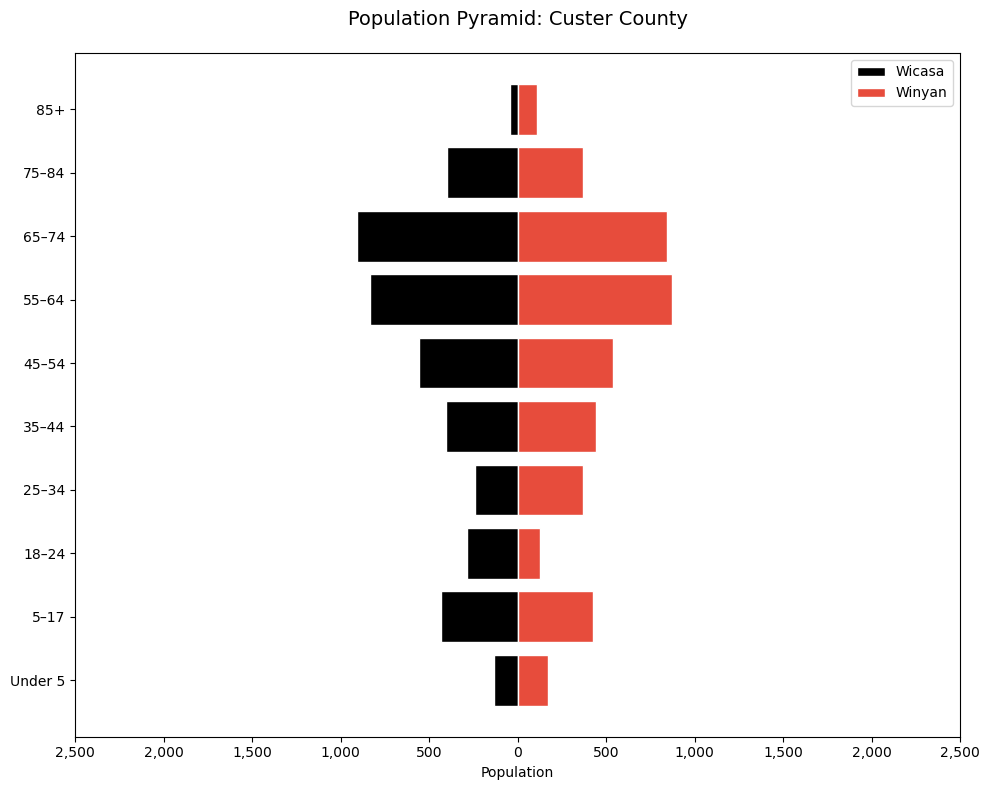

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
age_groups = ['Under 5', '5–17', '18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']
male = [136, 430, 283, 240, 407, 556, 835, 910, 399, 45]
female = [172, 424, 129, 372, 445, 537, 871, 845, 371, 108]

# Create pyramid
fig, ax = plt.subplots(figsize=(10, 8))
y_pos = np.arange(len(age_groups))

# Plot bars (male values negative for pyramid effect)
ax.barh(y_pos, [-x for x in male], color='black', label='Wicasa', edgecolor='white')
ax.barh(y_pos, female, color='#e74c3c', label='Winyan', edgecolor='white')

# Customize
ax.set_title('Population Pyramid: Custer County', pad=20, fontsize=14)
ax.set_xlabel('Population')
ax.set_yticks(y_pos)
ax.set_yticklabels(age_groups)
ax.legend()

# Format x-axis labels as absolute values
xticks = np.arange(-2500, 2501, 500)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{abs(x):,}" for x in xticks])

# Add value labels
for i, (m, f) in enumerate(zip(male, female)):
    ax.text(-m-100, i, f'{m:,}', ha='right', va='center', color='white')
    ax.text(f+100, i, f'{f:,}', ha='left', va='center', color='white')

plt.tight_layout()
plt.savefig('population_pyramid.png', dpi=300)
plt.show()

**Lets test the code for the wealthiest tribe on Turtle Island**

In [15]:
from census import Census
import pandas as pd

# Initialize Census with your API key
c = Census("94e0f9aa155dc0603dcb7f911d122b13d4bde1eb")

# Scott County FIPS: 27139 (State=27, County=139)
variables = {
    # Youth
    "Under 5 Male": "B01001_003E",
    "Under 5 Female": "B01001_027E",
    "5-9 Male": "B01001_004E",
    "5-9 Female": "B01001_028E",
    "10-14 Male": "B01001_005E", 
    "10-14 Female": "B01001_029E",
    "15-17 Male": "B01001_006E",
    "15-17 Female": "B01001_030E",
    
    # Young Adults
    "18-19 Male": "B01001_007E",
    "18-19 Female": "B01001_031E",
    "20 Male": "B01001_008E",
    "20 Female": "B01001_032E",
    "21 Male": "B01001_009E",
    "21 Female": "B01001_033E",
    "22-24 Male": "B01001_010E",
    "22-24 Female": "B01001_034E",
    
    # Adults
    "25-29 Male": "B01001_011E",
    "25-29 Female": "B01001_035E",
    "30-34 Male": "B01001_012E",
    "30-34 Female": "B01001_036E",
    "35-39 Male": "B01001_013E",
    "35-39 Female": "B01001_037E",
    "40-44 Male": "B01001_014E",
    "40-44 Female": "B01001_038E",
    "45-49 Male": "B01001_015E",
    "45-49 Female": "B01001_039E",
    "50-54 Male": "B01001_016E",
    "50-54 Female": "B01001_040E",
    
    # Older Adults
    "55-59 Male": "B01001_017E",
    "55-59 Female": "B01001_041E",
    "60-61 Male": "B01001_018E",
    "60-61 Female": "B01001_042E",
    "62-64 Male": "B01001_019E",
    "62-64 Female": "B01001_043E",
    
    # Seniors
    "65-66 Male": "B01001_020E",
    "65-66 Female": "B01001_044E",
    "67-69 Male": "B01001_021E",
    "67-69 Female": "B01001_045E",
    "70-74 Male": "B01001_022E",
    "70-74 Female": "B01001_046E",
    "75-79 Male": "B01001_023E",
    "75-79 Female": "B01001_047E",
    "80-84 Male": "B01001_024E",
    "80-84 Female": "B01001_048E",
    "85+ Male": "B01001_025E",
    "85+ Female": "B01001_049E"
}

# Fetch data for SCOTT COUNTY (FIPS 27139)
data = c.acs5.get(list(variables.values()), 
                 {"for": "county:139", "in": "state:27"})  # Updated state/county codes

# Convert to DataFrame
df = pd.DataFrame(data)
df = df.rename(columns={v:k for k,v in variables.items()})

# Sum age groups with future-proof pandas syntax
results = {
    # Youth
    "Under 5": {
        "Male": int(df["Under 5 Male"].iloc[0]),
        "Female": int(df["Under 5 Female"].iloc[0])
    },
    "5-17": {
        "Male": df[["5-9 Male", "10-14 Male", "15-17 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["5-9 Female", "10-14 Female", "15-17 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Young Adults
    "18-24": {
        "Male": df[["18-19 Male", "20 Male", "21 Male", "22-24 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["18-19 Female", "20 Female", "21 Female", "22-24 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Adults
    "25-34": {
        "Male": df[["25-29 Male", "30-34 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["25-29 Female", "30-34 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "35-44": {
        "Male": df[["35-39 Male", "40-44 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["35-39 Female", "40-44 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "45-54": {
        "Male": df[["45-49 Male", "50-54 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["45-49 Female", "50-54 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Older Adults
    "55-64": {
        "Male": df[["55-59 Male", "60-61 Male", "62-64 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["55-59 Female", "60-61 Female", "62-64 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    
    # Seniors
    "65-74": {
        "Male": df[["65-66 Male", "67-69 Male", "70-74 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["65-66 Female", "67-69 Female", "70-74 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "75-84": {
        "Male": df[["75-79 Male", "80-84 Male"]].sum(axis=1).iloc[0].astype(int),
        "Female": df[["75-79 Female", "80-84 Female"]].sum(axis=1).iloc[0].astype(int)
    },
    "85+": {
        "Male": int(df["85+ Male"].iloc[0]),
        "Female": int(df["85+ Female"].iloc[0])
    }
}

final_df = pd.DataFrame(results).T
print(final_df)

          Male  Female
Under 5   4761    4640
5-17     15283   15471
18-24     6570    6111
25-34     8756    8893
35-44    11420   11059
45-54    11002   10632
55-64     9532    9296
65-74     5467    5665
75-84     2254    2648
85+        704    1183


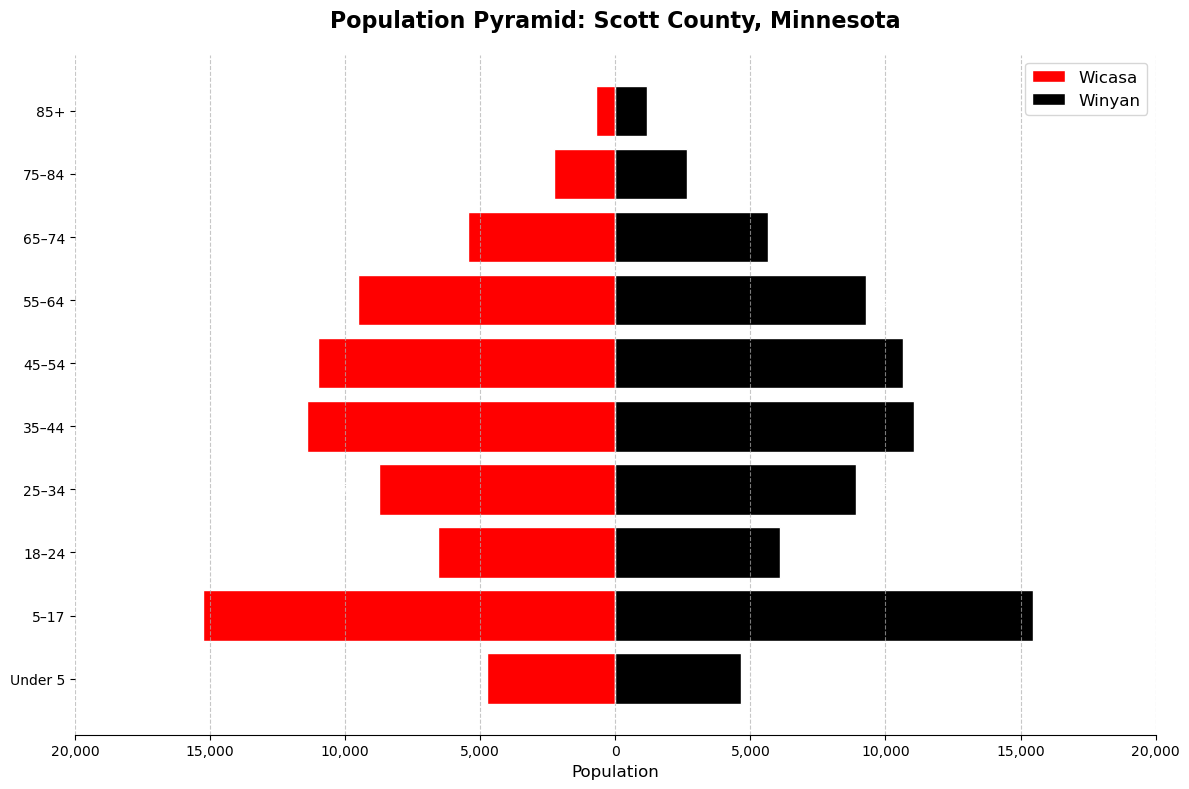

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
age_groups = ['Under 5', '5–17', '18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']
male = [4761, 15283, 6570, 8756, 11420, 11002, 9532, 5467, 2254, 704]
female = [4640, 15471, 6111, 8893, 11059, 10632, 9296, 5665, 2648, 1183]

# Create pyramid
fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(age_groups))

# Plot bars (male values negative for pyramid effect)
ax.barh(y_pos, [-x for x in male], color='red', label='Wicasa', edgecolor='white')
ax.barh(y_pos, female, color='', label='Winyan', edgecolor='white')

# Customize
ax.set_title('Population Pyramid: Scott County, Minnesota', pad=20, fontsize=16, weight='bold')
ax.set_xlabel('Population', fontsize=12)
ax.set_yticks(y_pos)
ax.set_yticklabels(age_groups, fontsize=10)
ax.legend(loc='upper right', fontsize=12)

# Format x-axis labels as absolute values
max_pop = max(max(male), max(female))
xticks = np.arange(-20000, 20001, 5000)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{abs(x):,}" for x in xticks], fontsize=10)

# Add value labels (only for the largest bars to avoid clutter)
for i, (m, f) in enumerate(zip(male, female)):
    if m > 3000:  # Threshold to avoid overlapping labels
        ax.text(-m-500, i, f'{m:,}', ha='right', va='center', color='white', fontsize=9)
    if f > 3000:
        ax.text(f+500, i, f'{f:,}', ha='left', va='center', color='white', fontsize=9)

# Add grid and adjust spines
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('scott_county_population_pyramid.png', dpi=300, bbox_inches='tight')
plt.show()

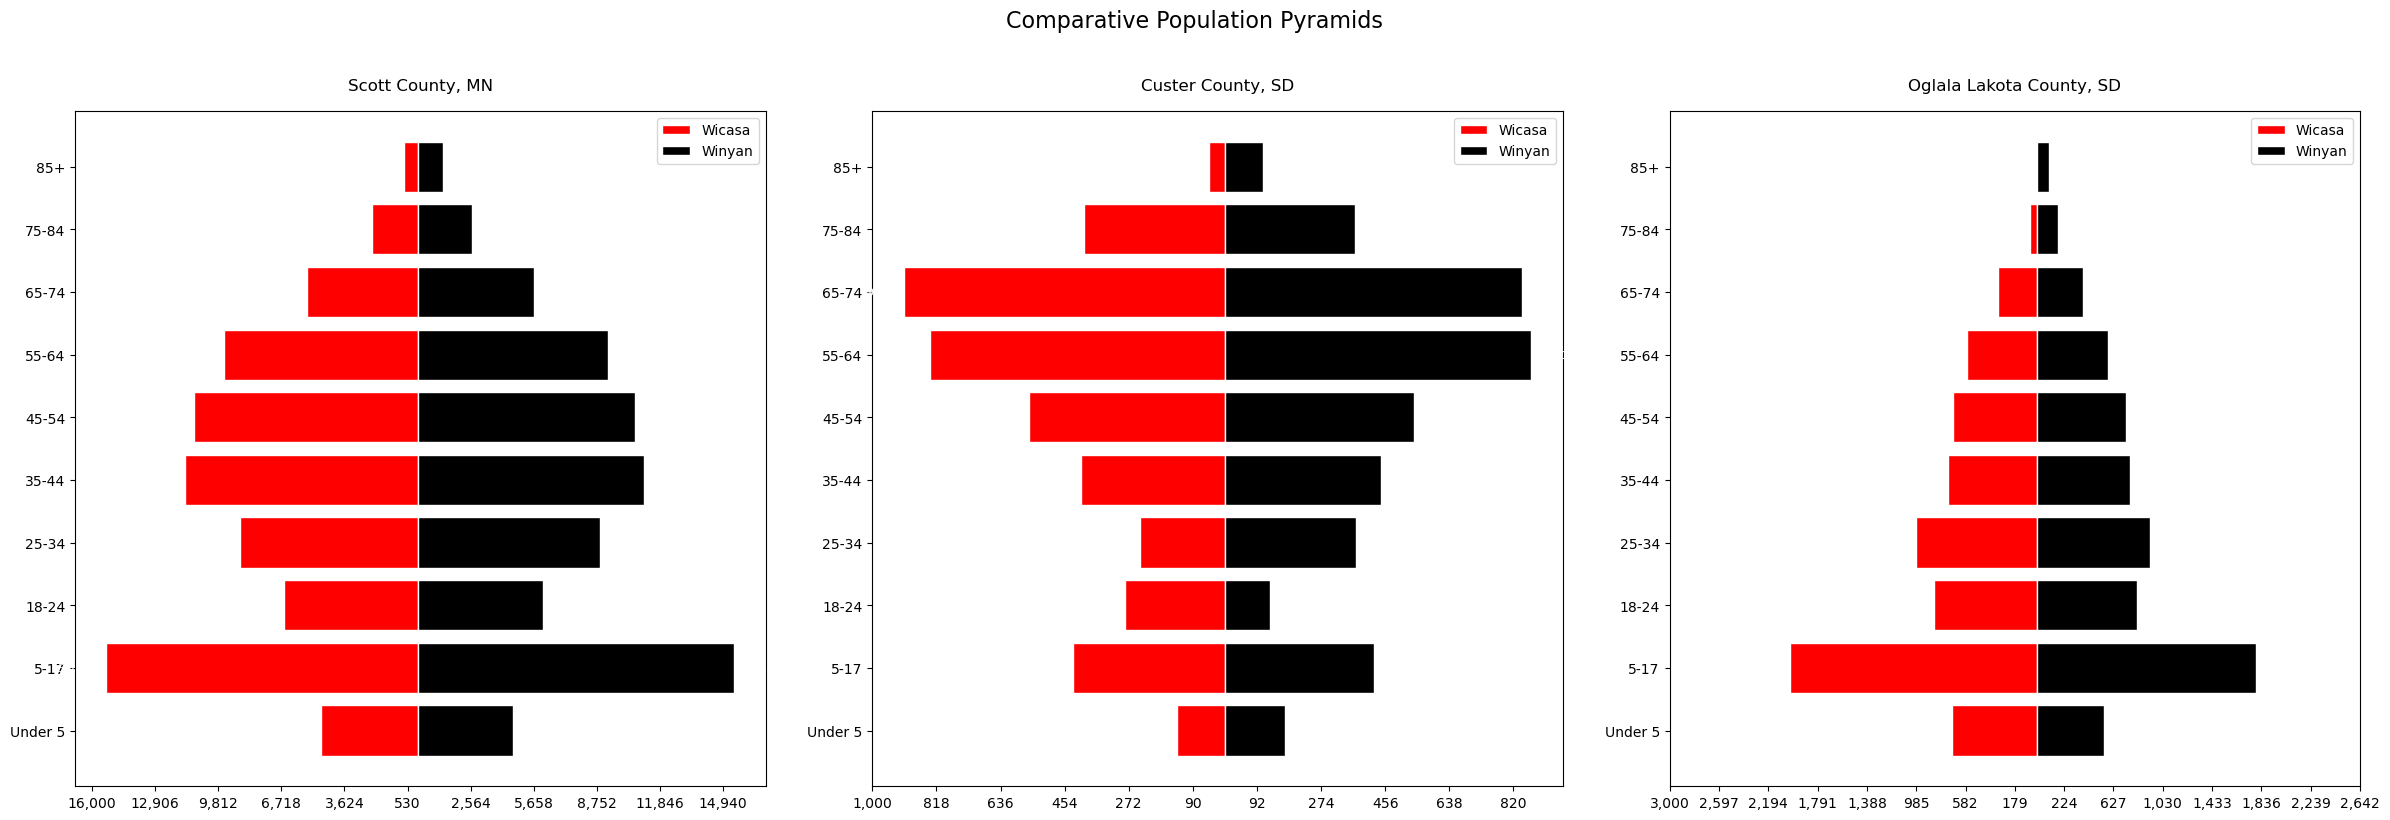

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for three counties (replace with your actual DataFrames)
scott = {
    "Male": [4761, 15283, 6570, 8756, 11420, 11002, 9532, 5467, 2254, 704],
    "Female": [4640, 15471, 6111, 8893, 11059, 10632, 9296, 5665, 2648, 1183]
}

custer = {
    "Male": [136, 430, 283, 240, 407, 556, 835, 910, 399, 45],
    "Female": [172, 424, 129, 372, 445, 537, 871, 845, 371, 108]
}

oglala = {
    "Male": [693, 2016, 836, 988, 723, 687, 566, 314, 56, 7],
    "Female": [548, 1790, 818, 927, 764, 731, 583, 378, 173, 97]
}

age_groups = ['Under 5', '5-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle('Comparative Population Pyramids', y=1.02, fontsize=16)

# Function to plot one pyramid
def plot_pyramid(ax, male, female, title):
    y_pos = np.arange(len(age_groups))
    ax.barh(y_pos, [-x for x in male], color='red', label='Wicasa', edgecolor='white')
    ax.barh(y_pos, female, color='black', label='Winyan', edgecolor='white')
    
    ax.set_title(title, pad=15)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(age_groups)
    ax.legend()
    
    # Dynamic x-axis scaling
    max_val = max(max(male), max(female))
    x_ticks = np.arange(-(max_val//1000+1)*1000, (max_val//1000+1)*1000, max_val//5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{abs(x):,}" for x in x_ticks])
    
    # Add value labels
    for i, (m, f) in enumerate(zip(male, female)):
        if m > 0:
            ax.text(-m - max_val*0.05, i, f'{m:,}', ha='right', va='center', color='white', fontsize=8)
        if f > 0:
            ax.text(f + max_val*0.05, i, f'{f:,}', ha='left', va='center', color='white', fontsize=8)

# Plot all three pyramids
plot_pyramid(ax1, scott["Male"], scott["Female"], "Scott County, MN")
plot_pyramid(ax2, custer["Male"], custer["Female"], "Custer County, SD")
plot_pyramid(ax3, oglala["Male"], oglala["Female"], "Oglala Lakota County, SD")

plt.tight_layout()
plt.savefig('comparative_pyramids.png', dpi=300, bbox_inches='tight')
plt.show()